In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples for each category
n_samples_cat_1 = 1200  # Category 1
n_samples_cat_0 = 1800  # Category 0

# Correlation matrix for Temperature, pH, and Conductivity
correlation_matrix = np.array([
    [1.0, -0, 0.5],  # Correlation of temperature with pH and conductivity
    [-0.7, 1.0, -0.3],  # Correlation of pH with other variables
    [0.5, -0.3, 1.0]    # Correlation of conductivity with other variables
])

# Standard deviations for Temperature, pH, and Conductivity
std_devs = np.array([5.0, 0.5, 0.5])  # Std devs for temperature, pH, conductivity

# Means for Temperature, pH, and Conductivity (Category 1)
means_cat_1 = np.array([25.0, 6.8, 1.5])  # Adjusted means for Category 1

# Generate correlated data for Category 1
correlated_data_cat_1 = np.random.multivariate_normal(means_cat_1, 
                                                      np.diag(std_devs) @ correlation_matrix @ np.diag(std_devs), 
                                                      n_samples_cat_1)

# Extract Temperature, pH, and Conductivity for Category 1
temperature_cat_1 = correlated_data_cat_1[:, 0]
pH_cat_1 = np.clip(correlated_data_cat_1[:, 1], 6.5, 7.5)
conductivity_cat_1 = np.clip(correlated_data_cat_1[:, 2], 0.8, 2.2)

# Generate Stage and PPM for Category 1
stage_cat_1 = np.random.choice([1, 2, 3, 4], n_samples_cat_1, p=[0.3, 0.3, 0.2, 0.2])
PPM_cat_1 = np.zeros(n_samples_cat_1)

for i in range(n_samples_cat_1):
    if stage_cat_1[i] == 1:
        PPM_cat_1[i] = np.random.randint(400, 601)
    elif stage_cat_1[i] == 2:
        PPM_cat_1[i] = np.random.randint(600, 1001)
    elif stage_cat_1[i] == 3:
        PPM_cat_1[i] = np.random.randint(1000, 1401)
    elif stage_cat_1[i] == 4:
        PPM_cat_1[i] = np.random.randint(1400, 1801)

# Generate correlated data for Category 0
means_cat_0 = np.array([25.0, 6.0, 0.4])  # Adjusted means for Category 0 (lower pH, lower conductivity)
correlated_data_cat_0 = np.random.multivariate_normal(means_cat_0, 
                                                      np.diag(std_devs) @ correlation_matrix @ np.diag(std_devs), 
                                                      n_samples_cat_0)

# Extract Temperature, pH, and Conductivity for Category 0
temperature_cat_0 = correlated_data_cat_0[:, 0]
pH_cat_0 = np.clip(correlated_data_cat_0[:, 1], 3.0, 6.5)
conductivity_cat_0 = np.clip(correlated_data_cat_0[:, 2], 0.0, 0.8)

# Generate Stage and PPM for Category 0
stage_cat_0 = np.random.choice([1, 2, 3, 4], n_samples_cat_0)
PPM_cat_0 = np.zeros(n_samples_cat_0)

for i in range(n_samples_cat_0):
    if stage_cat_0[i] == 1:
        PPM_cat_0[i] = np.random.randint(100, 401)
    elif stage_cat_0[i] == 2:
        PPM_cat_0[i] = np.random.randint(400, 601)
    elif stage_cat_0[i] == 3:
        PPM_cat_0[i] = np.random.randint(600, 1001)
    elif stage_cat_0[i] == 4:
        PPM_cat_0[i] = np.random.randint(800, 1401)

# Create data for Categoria 1
data_cat_1 = pd.DataFrame({
    'Temperature': np.round(temperature_cat_1, 2),
    'Stage': stage_cat_1,
    'pH': np.round(pH_cat_1, 2),
    'PPM': PPM_cat_1.astype(int),
    'Conductivity': np.round(conductivity_cat_1, 2),
    'Categoria': 1
})

# Create data for Categoria 0
data_cat_0 = pd.DataFrame({
    'Temperature': np.round(temperature_cat_0, 2),
    'Stage': stage_cat_0,
    'pH': np.round(pH_cat_0, 2),
    'PPM': PPM_cat_0.astype(int),
    'Conductivity': np.round(conductivity_cat_0, 2),
    'Categoria': 0
})

# Combine both categories
data_balanced = pd.concat([data_cat_1, data_cat_0])

# Generate random noise data for both categories
n_noise = 150

temperature_noise_1 = np.random.uniform(10, 40, n_noise)
temperature_noise_0 = np.random.uniform(10, 40, n_noise)

stage_noise_1 = np.random.choice([1, 2, 3, 4], n_noise)
stage_noise_0 = np.random.choice([1, 2, 3, 4], n_noise)

pH_noise_1 = np.random.uniform(3.0, 7.5, n_noise)
pH_noise_0 = np.random.uniform(3.0, 7.5, n_noise)

PPM_noise_1 = np.random.randint(100, 1801, n_noise)
PPM_noise_0 = np.random.randint(100, 1801, n_noise)

conductivity_noise_1 = np.random.uniform(0.0, 2.5, n_noise)
conductivity_noise_0 = np.random.uniform(0.0, 2.5, n_noise)

# Create noisy data for Categoria 1
noise_cat_1 = pd.DataFrame({
    'Temperature': np.round(temperature_noise_1, 2),
    'Stage': stage_noise_1,
    'pH': np.round(pH_noise_1, 2),
    'PPM': PPM_noise_1,
    'Conductivity': np.round(conductivity_noise_1, 2),
    'Categoria': 1
})

# Create noisy data for Categoria 0
noise_cat_0 = pd.DataFrame({
    'Temperature': np.round(temperature_noise_0, 2),
    'Stage': stage_noise_0,
    'pH': np.round(pH_noise_0, 2),
    'PPM': PPM_noise_0,
    'Conductivity': np.round(conductivity_noise_0, 2),
    'Categoria': 0
})

# Combine noisy data with the original balanced dataset
data_noisy_balanced = pd.concat([data_balanced, noise_cat_1, noise_cat_0])

# Shuffle the combined dataset
data_noisy_balanced = data_noisy_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\jcyamuni44\AppData\Local\Temp\ipykernel_14848\2433934654.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  correlated_data_cat_1 = np.random.multivariate_normal(means_cat_1,
C:\Users\jcyamuni44\AppData\Local\Temp\ipykernel_14848\2433934654.py:52: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  correlated_data_cat_0 = np.random.multivariate_normal(means_cat_0,


Frequency of Categories:
Categoria
0    1950
1    1350
Name: count, dtype: int64


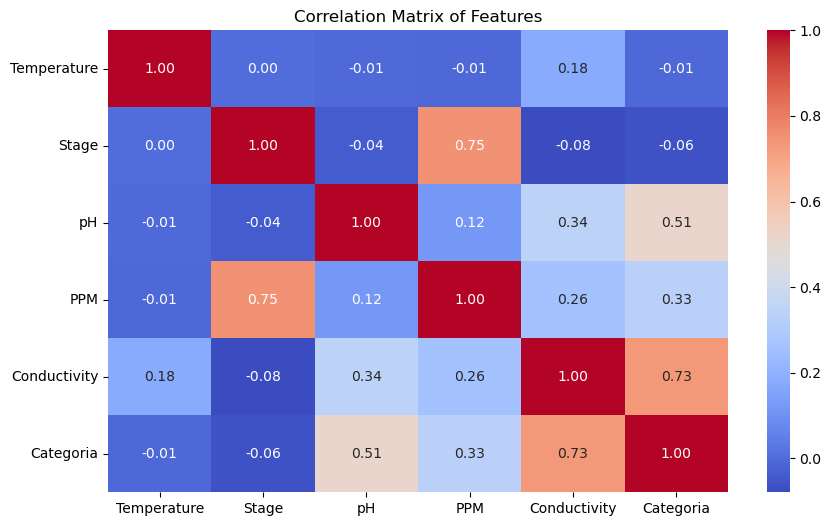

In [21]:
# Print the frequency of each category
category_counts = data_noisy_balanced['Categoria'].value_counts()
print("Frequency of Categories:")
print(category_counts)

# Calculate and display the correlation matrix
correlation_matrix = data_noisy_balanced.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


In [23]:
data_noisy_balanced.to_csv('data.csv')

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

# Load the dataset
file_path = r'C:\Users\jcyamuni44\Desktop\proyecto-lechugas\data.csv'
data = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Check the first few rows to understand the structure of the dataset
print(data.head())

# Define the feature columns and target column
X = data.drop(columns=['Categoria'])  # All columns except 'Categoria' are features
y = data['Categoria']  # 'Categoria' is the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature values for better logistic regression performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression with hyperparameter tuning to maximize Category 1
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers to try
    'class_weight': ['balanced', None]  # Try balanced class weights
}

log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')  # You can use 'f1' to focus on precision/recall balance
grid_search.fit(X_train_scaled, y_train)

# Get the best logistic regression model
best_log_reg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy Score:", accuracy)

# Save the model and the scaler for future use
model_path = r'C:\Users\jcyamuni44\Desktop\proyecto-lechugas\log_reg_model.joblib'
scaler_path = r'C:\Users\jcyamuni44\Desktop\proyecto-lechugas\scaler.joblib'
joblib.dump(best_log_reg, model_path)
joblib.dump(scaler, scaler_path)

# Make a synthetic prediction to demonstrate how to use the model later
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Ensure the synthetic sample has the correct number of features
# Example synthetic data (replace with meaningful values from your context)
synthetic_sample = pd.DataFrame([[25, 2, 6.8, 900, 1.5]], columns=X.columns)

# Scale the synthetic sample using the loaded scaler
synthetic_sample_scaled = loaded_scaler.transform(synthetic_sample)

# Predict the category for the synthetic sample
synthetic_prediction = loaded_model.predict(synthetic_sample_scaled)
print("\nSynthetic Prediction:", synthetic_prediction[0])



   Temperature  Stage    pH  PPM  Conductivity  Categoria
0        15.64      2  7.19  833          1.44          1
1        27.51      2  7.00  761          2.20          1
2        22.80      2  5.66  571          0.75          0
3        24.53      3  6.23  939          0.38          0
4        17.51      2  7.14  649          1.05          1
Best Parameters: {'C': 10, 'class_weight': None, 'solver': 'lbfgs'}

Confusion Matrix:
[[551  34]
 [ 27 378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       585
           1       0.92      0.93      0.93       405

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990


Accuracy Score: 0.9383838383838384

Synthetic Prediction: 1


In [27]:
from sklearn.tree import DecisionTreeClassifier
# Load the dataset
file_path = r'C:\Users\jcyamuni44\Desktop\proyecto-lechugas\data.csv'
data = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Check the first few rows to understand the structure of the dataset
print(data.head())

# Define the feature columns and target column
X = data.drop(columns=['Categoria'])  # All columns except 'Categoria' are features
y = data['Categoria']  # 'Categoria' is the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature values for better logistic regression performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression with hyperparameter tuning to maximize Category 1
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers to try
    'class_weight': ['balanced', None]  # Try balanced class weights
}

log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')  # You can use 'f1' to focus on precision/recall balance
grid_search.fit(X_train_scaled, y_train)

# Get the best logistic regression model
best_log_reg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy Score:", accuracy)

# Save the model and the scaler for future use
model_path = r'C:\Users\jcyamuni44\Desktop\proyecto-lechugas\log_reg_model.joblib'
scaler_path = r'C:\Users\jcyamuni44\Desktop\proyecto-lechugas\scaler.joblib'
joblib.dump(best_log_reg, model_path)
joblib.dump(scaler, scaler_path)

# Make a synthetic prediction to demonstrate how to use the model later
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Ensure the synthetic sample has the correct number of features
# Example synthetic data (replace with meaningful values from your context)
synthetic_sample = pd.DataFrame([[25, 2, 6.8, 900, 1.5]], columns=X.columns)

# Scale the synthetic sample using the loaded scaler
synthetic_sample_scaled = loaded_scaler.transform(synthetic_sample)

# Predict the category for the synthetic sample
synthetic_prediction = loaded_model.predict(synthetic_sample_scaled)
print("\nSynthetic Prediction:", synthetic_prediction[0])


   Temperature  Stage    pH  PPM  Conductivity  Categoria
0        15.64      2  7.19  833          1.44          1
1        27.51      2  7.00  761          2.20          1
2        22.80      2  5.66  571          0.75          0
3        24.53      3  6.23  939          0.38          0
4        17.51      2  7.14  649          1.05          1
Best Parameters: {'C': 10, 'class_weight': None, 'solver': 'lbfgs'}

Confusion Matrix:
[[551  34]
 [ 27 378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       585
           1       0.92      0.93      0.93       405

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990


Accuracy Score: 0.9383838383838384

Synthetic Prediction: 1


Mejores hiperparámetros para el árbol de decisión: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}

Confusion Matrix (Árbol de Decisión):
[[557  28]
 [ 24 381]]

Classification Report (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       585
           1       0.93      0.94      0.94       405

    accuracy                           0.95       990
   macro avg       0.95      0.95      0.95       990
weighted avg       0.95      0.95      0.95       990


Accuracy Score (Árbol de Decisión): 0.9474747474747475


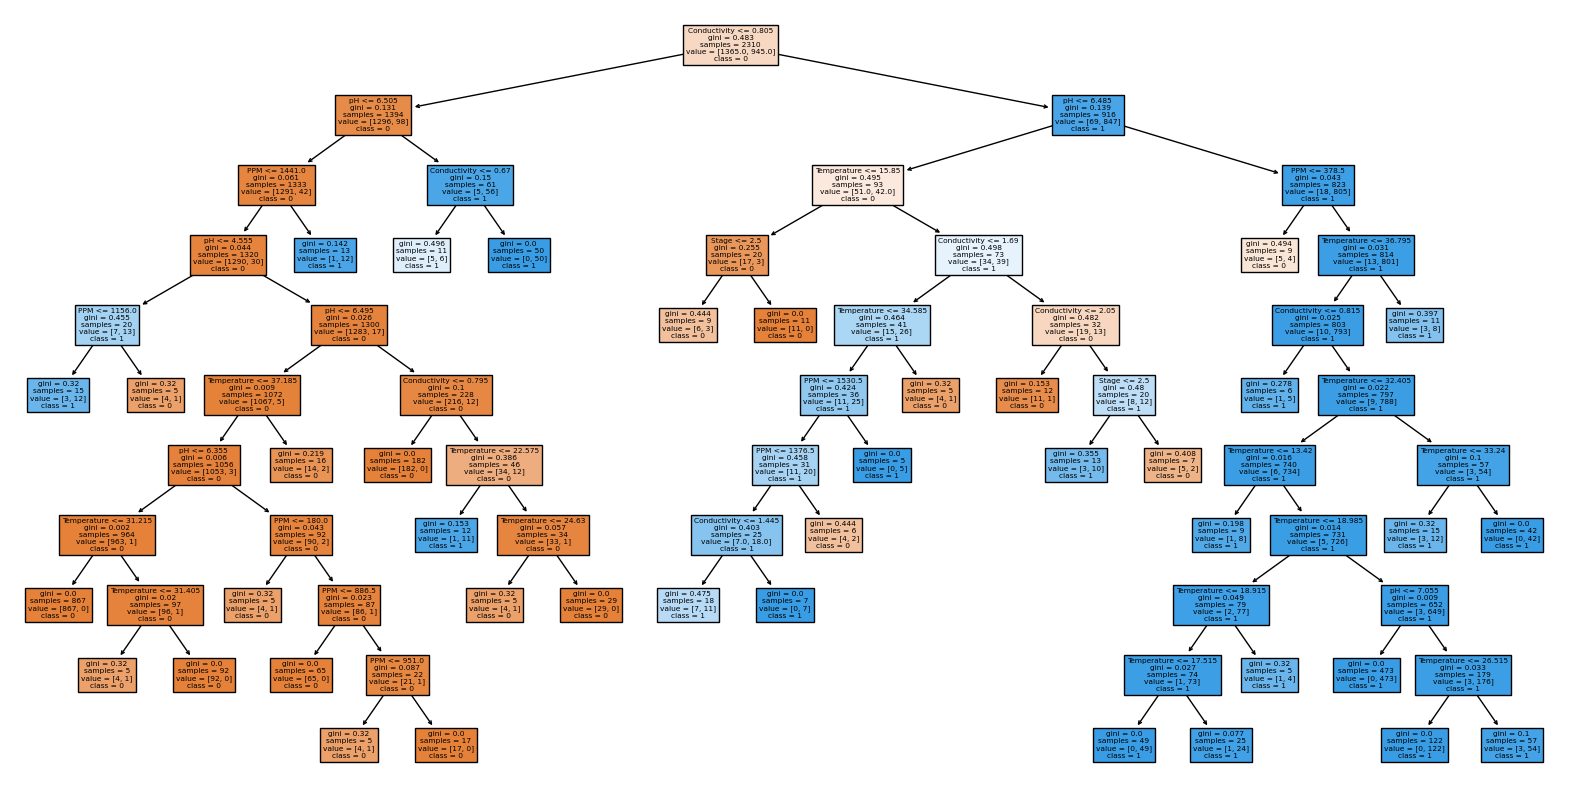


Synthetic Prediction (Árbol de Decisión): 1


In [33]:
# Importar librerías adicionales para el árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Definir el clasificador de árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros a probar
param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],        # Profundidad máxima del árbol
    'min_samples_split': [2, 10, 20],        # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 5, 10],          # Número mínimo de muestras en una hoja
    'criterion': ['gini', 'entropy']         # Función para medir la calidad de una división
}

# Realizar la búsqueda de hiperparámetros con validación cruzada para el árbol
grid_search_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)  # Usar datos sin estandarizar

# Obtener los mejores parámetros para el árbol de decisión
best_params_tree = grid_search_tree.best_params_
print(f"Mejores hiperparámetros para el árbol de decisión: {best_params_tree}")

# Entrenar el modelo final con los mejores hiperparámetros
best_tree_clf = grid_search_tree.best_estimator_

# Predicción en el conjunto de prueba para el árbol de decisión
y_pred_tree = best_tree_clf.predict(X_test)

# Evaluación del árbol de decisión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Mostrar los resultados del árbol de decisión
print("\nConfusion Matrix (Árbol de Decisión):")
print(conf_matrix_tree)
print("\nClassification Report (Árbol de Decisión):")
print(class_report_tree)
print("\nAccuracy Score (Árbol de Decisión):", accuracy_tree)

# Visualización del árbol de decisión
plt.figure(figsize=(20,10))  # Ajustar el tamaño del gráfico
tree.plot_tree(best_tree_clf, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

# Guardar el modelo del árbol de decisión
tree_model_path = r'C:\Users\jcyamuni44\Desktop\proyecto-lechugas\tree_model.joblib'
joblib.dump(best_tree_clf, tree_model_path)

# Cargar el modelo del árbol de decisión
loaded_tree_model = joblib.load(tree_model_path)

# Predecir la categoría para la muestra sintética usando el árbol de decisión
synthetic_prediction_tree = loaded_tree_model.predict(synthetic_sample)
print("\nSynthetic Prediction (Árbol de Decisión):", synthetic_prediction_tree[0])